In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [3]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT s.store_key,i.item_name,SUM(f.quantity)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key" \
              " GROUP BY CUBE(s.store_key,i.item_name) "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', '100% Juice Box Variety 6.75 oz ', 10),
 ('S0001', 'A&W Root Beer - 12 oz cans', 60),
 ('S0001', 'A&W Root Beer Diet - 12 oz cans', 8),
 ('S0001', 'Advil 2 pill packets', 28),
 ('S0001', 'All Purpose Cleaner 409 Spray', 46),
 ('S0001', 'Altoids Small Packs Variety', 13),
 ('S0001', 'Apple Sauce Variety GoGO Squeeze 3.2oz', 37),
 ('S0001', 'AquaFina Purified Drinking Water 16oz', 39),
 ('S0001', 'Austin Cookie Cracker Variety', 10),
 ('S0001', 'Austin Toasty Crackers w/ PBtr', 22),
 ('S0001', 'Baked Chips Variety Mix Frito', 50),
 ('S0001', "Barq's Root Beer - 12 oz cans", 43),
 ('S0001', 'Belvita Hard Biscuits Blueberry', 11),
 ('S0001', 'Belvita Hard Biscuits Cinnamon', 24),
 ('S0001', 'Belvita Protein Oats Soft Biscuit', 50),
 ('S0001', 'Blue Diamond Almonds Rstd, Sltd', 13),
 ('S0001', 'Bounty Paper Towels Select a Size ', 16),
 ('S0001', 'Breath Savers Peppermints 12/roll ', 28),
 ('S0001', 'Brisk Lemon Iced Tea - 12 oz cans', 30),
 ('S0001', 'Cascade Gel Packs Dishwashe

In [4]:
df13 = pd.DataFrame(list(records), columns=['Store_key', 'Item_name' ,'Quantity'])
df13.head(10)

,Store_key,Item_name,Quantity
0,S0001,100% Juice Box Variety 6.75 oz,10
1,S0001,A&W Root Beer - 12 oz cans,60
2,S0001,A&W Root Beer Diet - 12 oz cans,8
3,S0001,Advil 2 pill packets,28
4,S0001,All Purpose Cleaner 409 Spray,46
5,S0001,Altoids Small Packs Variety,13
6,S0001,Apple Sauce Variety GoGO Squeeze 3.2oz,37
7,S0001,AquaFina Purified Drinking Water 16oz,39
8,S0001,Austin Cookie Cracker Variety,10
9,S0001,Austin Toasty Crackers w/ PBtr,22


In [5]:
df13.describe()


,Quantity
count,1.881000e+05
mean,1.275956e+02
std,1.387091e+04
min,1.000000e+00
25%,2.000000e+01
50%,3.000000e+01
75%,4.200000e+01
max,6.000185e+06


In [6]:
df13.Store_key.unique()

array(['S0001', 'S0002', 'S0003', 'S0004', 'S0005', 'S0006', 'S0007',
       'S0008', 'S0009', 'S0010', 'S00100', 'S00101', 'S00102', 'S00103',
       'S00104', 'S00105', 'S00106', 'S00107', 'S00108', 'S00109',
       'S0011', 'S00110', 'S00111', 'S00112', 'S00113', 'S00114',
       'S00115', 'S00116', 'S00117', 'S00118', 'S00119', 'S0012',
       'S00120', 'S00121', 'S00122', 'S00123', 'S00124', 'S00125',
       'S00126', 'S00127', 'S00128', 'S00129', 'S0013', 'S00130',
       'S00131', 'S00132', 'S00133', 'S00134', 'S00135', 'S00136',
       'S00137', 'S00138', 'S00139', 'S0014', 'S00140', 'S00141',
       'S00142', 'S00143', 'S00144', 'S00145', 'S00146', 'S00147',
       'S00148', 'S00149', 'S0015', 'S00150', 'S00151', 'S00152',
       'S00153', 'S00154', 'S00155', 'S00156', 'S00157', 'S00158',
       'S00159', 'S0016', 'S00160', 'S00161', 'S00162', 'S00163',
       'S00164', 'S00165', 'S00166', 'S00167', 'S00168', 'S00169',
       'S0017', 'S00170', 'S00171', 'S00172', 'S00173', 'S

In [7]:
df13['Quantity'] = df13['Quantity'].astype(int) #float

df13['Quantity'] = df13.groupby('Store_key')['Quantity'].transform('sum')
print (df13)

       Store_key                        Item_name  Quantity
0          S0001  100% Juice Box Variety 6.75 oz    16338.0
1          S0001       A&W Root Beer - 12 oz cans   16338.0
2          S0001  A&W Root Beer Diet - 12 oz cans   16338.0
3          S0001             Advil 2 pill packets   16338.0
4          S0001    All Purpose Cleaner 409 Spray   16338.0
...          ...                              ...       ...
188095      None    Ice Breaker Mints Sugar Free        NaN
188096      None   K Cups – Starbuck's Pike Place       NaN
188097      None           Pop Chips Variety bags       NaN
188098      None               Pepsi - 12 oz cans       NaN
188099      None  A&W Root Beer Diet - 12 oz cans       NaN

[188100 rows x 3 columns]


In [8]:
df13[['Store_key','Quantity']] = df13[['Store_key','Quantity']].mask(df13['Quantity'].duplicated()).fillna('')
df13.head(20)

,Store_key,Item_name,Quantity
0,S0001,100% Juice Box Variety 6.75 oz,16338.0
1,,A&W Root Beer - 12 oz cans,
2,,A&W Root Beer Diet - 12 oz cans,
3,,Advil 2 pill packets,
4,,All Purpose Cleaner 409 Spray,
5,,Altoids Small Packs Variety,
6,,Apple Sauce Variety GoGO Squeeze 3.2oz,
7,,AquaFina Purified Drinking Water 16oz,
8,,Austin Cookie Cracker Variety,
9,,Austin Toasty Crackers w/ PBtr,


In [9]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT s.store_key ,i.item_name,SUM(f.quantity) as Quantity" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              "Where s.store_key = 'S0001' " \
              " GROUP BY (s.store_key,i.item_name) "\
              "Order by Quantity DESC"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', 'Pepsi - 12 oz cans', 92),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', 90),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', 78),
 ('S0001', 'Waterloo Sparkling Lime 12oz', 70),
 ('S0001', 'Njoy Sugar Canister 22 oz', 69),
 ('S0001', 'Vita Coconut Water 10oz ', 68),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', 67),
 ('S0001', 'Sprite - 12 oz cans', 64),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', 63),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', 62),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', 61),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', 60),
 ('S0001', 'A&W Root Beer - 12 oz cans', 60),
 ('S0001', 'Dark Chocolate Mint Patties', 60),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', 59),
 ('S0001', 'Large Trash Bags Black 33 gal', 59),
 ('S0001', 'Kellogg Fun Mix Cheez it, Prngls, Fam Amos', 58),
 ('S0001', 'Quaker Instant Oatmeal Maple Brn Sugar', 57),
 ('S0001', 'Frito Bold Flavors Variety', 56),
 ('S0001', 'Keebler Cookie & Cr

In [10]:
store_1 = pd.DataFrame(list(records), columns=['Store_key', 'Item_name' ,'Quantity'])
store_1.head(10)

,Store_key,Item_name,Quantity
0,S0001,Pepsi - 12 oz cans,92
1,S0001,Muscle Milk Protein Shake Van. 11oz,90
2,S0001,Hefty Supreme Foam Plates 6 inch,78
3,S0001,Waterloo Sparkling Lime 12oz,70
4,S0001,Njoy Sugar Canister 22 oz,69
5,S0001,Vita Coconut Water 10oz,68
6,S0001,Muscle Milk Protein Shake Strbry. 11oz,67
7,S0001,Sprite - 12 oz cans,64
8,S0001,Cheez It White Cheddar 1.5 oz,63
9,S0001,"Sargento Bal. Breaks (fruit, nut, cheese)",62


In [11]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT s.store_key ,i.item_name,SUM(f.quantity) as Quantity" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              "Where s.store_key = 'S0001' " \
              " GROUP BY (s.store_key,i.item_name) "\
              "Order by Quantity DESC "\
              "LIMIT 3"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', 'Pepsi - 12 oz cans', 92),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', 90),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', 78)]

store_1 = pd.DataFrame(list(records), columns=['Store_key', 'Item_name' ,'Quantity'])
store_1

In [13]:
store_1['Quantity']=store_1['Quantity'].astype('float64')

In [16]:
store_df= store_1.set_index(['Item_name'])

### Pie Chart of Store_1

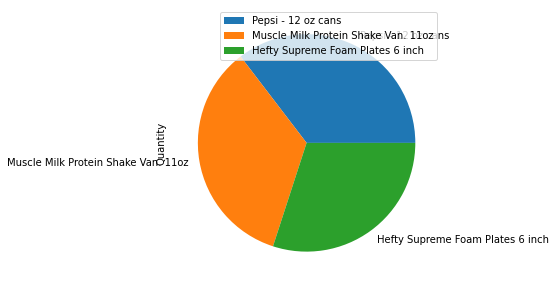

In [17]:
plot = store_df.plot.pie(y='Quantity', figsize=(5, 5))

In [29]:
store_1.dtypes

Store_key     object
Item_name     object
Quantity     float64
dtype: object

### Bar Chart of Store_1

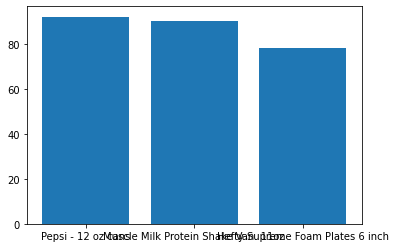

In [36]:
plt.bar(store_1['Item_name'],store_1['Quantity'])
plt.show()

In [37]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT s.store_key ,i.item_name,SUM(f.quantity) as Quantity" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              "Where s.store_key = 'S0087' " \
              " GROUP BY (s.store_key,i.item_name) "\
              "Order by Quantity DESC "\
              "LIMIT 3"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0087', 'Sprite - 12 oz cans', 119),
 ('S0087', 'Belvita Hard Biscuits Cinnamon', 83),
 ('S0087', 'Topo Chico 20oz plastic', 75)]

In [38]:
store_87 = pd.DataFrame(list(records), columns=['Store_key', 'Item_name' ,'Quantity'])
store_87

,Store_key,Item_name,Quantity
0,S0087,Sprite - 12 oz cans,119
1,S0087,Belvita Hard Biscuits Cinnamon,83
2,S0087,Topo Chico 20oz plastic,75


In [39]:
store_87['Quantity']=store_87['Quantity'].astype('float64')

In [40]:
store_df_87= store_87.set_index(['Item_name'])

### Pie Chart of Store_87

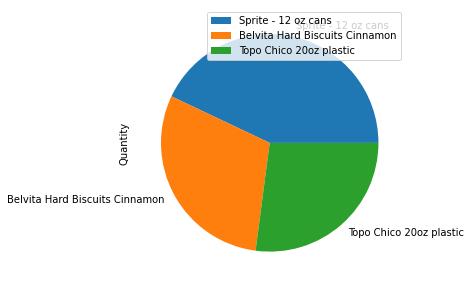

In [41]:
plot = store_df_87.plot.pie(y='Quantity', figsize=(5, 5))

### Bar Chart of Store_87

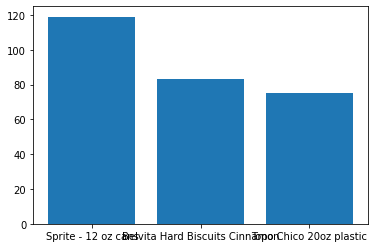

In [42]:
plt.bar(store_87['Item_name'],store_87['Quantity'])
plt.show()